# Resale flat transactions from Jan 2015 to Feb 2018

This notebook analyzes the resale flat transactions from Jan 2015 to Feb 2018 

Data URL : https://data.gov.sg/dataset/resale-flat-prices

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib import rcParams
import datetime as dt
import csv

#set global plot aesthetics
rcParams['axes.titlesize'] = 18
rcParams['axes.titlepad'] = 15
rcParams['axes.labelsize'] = 14
rcParams['axes.labelpad'] = 10
rcParams['axes.labelsize'] = 12

%matplotlib inline

## Load and check data

In [2]:
file = "data/resale-flat-prices/resale-flat-prices-based-on-registration-date-from-jan-2015-onwards.csv"

names = ['month', 'town','flat_type','block','street_name','storey_range','floor_area_sqm',
        'flat_model','lease_commence_date','remaining_lease','resale_price']
dtype = ['object','U50','U50','U8','U50','U50','f8','U50','object','f8','f8'] 

#generate data from csv file, using only selected columns
data = np.genfromtxt(file, skip_header=1,names=names, dtype = dtype,
                       usecols = ['month','town','flat_type','storey_range','floor_area_sqm',
        'flat_model','lease_commence_date','remaining_lease','resale_price'], 
                       delimiter=",",missing_values=['na','-'],filling_values=[0])

#convert month to datetime
data['month'] = [dt.datetime.strptime(x.decode('utf'), '%Y-%m') for x in data['month']]

#get date range of data
startdate = dt.datetime.strftime(data['month'].min(),'%Y-%m')
enddate = dt.datetime.strftime(data['month'].max(),'%Y-%m')

#check that all data is valid. Values should be zero
print(len(data[data['resale_price']<=0]))     
print(len(data[data['floor_area_sqm']<=0]))   
print(len(data[data['remaining_lease']<=0]))  

#check that all towns and flat type entries are all valid
flattypes = np.unique(data['flat_type'])
towns = np.unique(data['town'])

print(flattypes)
print(towns)

0
0
0
['1 ROOM' '2 ROOM' '3 ROOM' '4 ROOM' '5 ROOM' 'EXECUTIVE'
 'MULTI-GENERATION']
['ANG MO KIO' 'BEDOK' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH' 'BUKIT PANJANG'
 'BUKIT TIMAH' 'CENTRAL AREA' 'CHOA CHU KANG' 'CLEMENTI' 'GEYLANG'
 'HOUGANG' 'JURONG EAST' 'JURONG WEST' 'KALLANG/WHAMPOA' 'MARINE PARADE'
 'PASIR RIS' 'PUNGGOL' 'QUEENSTOWN' 'SEMBAWANG' 'SENGKANG' 'SERANGOON'
 'TAMPINES' 'TOA PAYOH' 'WOODLANDS' 'YISHUN']


## Get preliminary info about data

In [3]:
#get data basic info
title = "Resale flat prices from {} to {}".format(startdate,enddate)
print("***{}***".format(title))
print()

#print number of resale transactions
print("There were {} resale transactions from {} to {}".format(len(data),startdate, enddate))
print("Resale transactions covered {} towns".format(len(towns)))
print()

#print number of resale transactions for each flattype
print("Number of resale transactions by flat-type:")

for flattype in flattypes:
    num = len(data[data['flat_type']==flattype])
    print("{}: {}".format(flattype,num))

print()

#print highest resale price with corresponding flat specs
highestprice = data['resale_price'].max()
hindex = data['resale_price'].argmax()

print("Highest resale price was ${:.2f} for a flat in {}, sold in {}".
      format(highestprice, data['town'][hindex].title(),
             dt.datetime.strftime(data['month'][hindex],'%Y-%m')))

print("- Flat-type: {}\n- Floor number: {}\n- Floor area: {} square metres\n- Remaining Lease: {} years".
      format(data['flat_type'][hindex].lower(), data['storey_range'][hindex].lower(), 
            data['floor_area_sqm'][hindex],data['remaining_lease'][hindex]))
print()

#print median resale price
medianprice = np.median(data['resale_price'])
print("Median price was ${:.2f}".format(medianprice))
print()

#print lowest resale price with corresponding flat specs
lowestprice = data['resale_price'].min()
lindex = data['resale_price'].argmin()

print("Lowest resale price was ${:.2f} for a flat in {}, sold in {}".
      format(lowestprice, data['town'][lindex].title(),
             dt.datetime.strftime(data['month'][lindex],'%Y-%m')))

print("- Flat-type: {}\n- Floor number: {}\n- Floor area: {} square metres\n- Remaining Lease: {} years".
      format(data['flat_type'][lindex].lower(), data['storey_range'][lindex].lower(), 
            data['floor_area_sqm'][lindex],data['remaining_lease'][lindex]))


***Resale flat prices from 2015-01 to 2018-02***

There were 59809 resale transactions from 2015-01 to 2018-02
Resale transactions covered 26 towns

Number of resale transactions by flat-type:
1 ROOM: 25
2 ROOM: 598
3 ROOM: 15611
4 ROOM: 24628
5 ROOM: 14257
EXECUTIVE: 4681
MULTI-GENERATION: 9

Highest resale price was $1180000.00 for a flat in Bishan, sold in 2017-02
- Flat-type: 5 room
- Floor number: 40 to 42
- Floor area: 120.0 square metres
- Remaining Lease: 93.0 years

Median price was $410000.00

Lowest resale price was $90500.00 for a flat in Woodlands, sold in 2018-01
- Flat-type: 3 room
- Floor number: 01 to 03
- Floor area: 60.0 square metres
- Remaining Lease: 66.0 years


## Histogram of resale prices for all transactions from 2015-01 to 2018-02

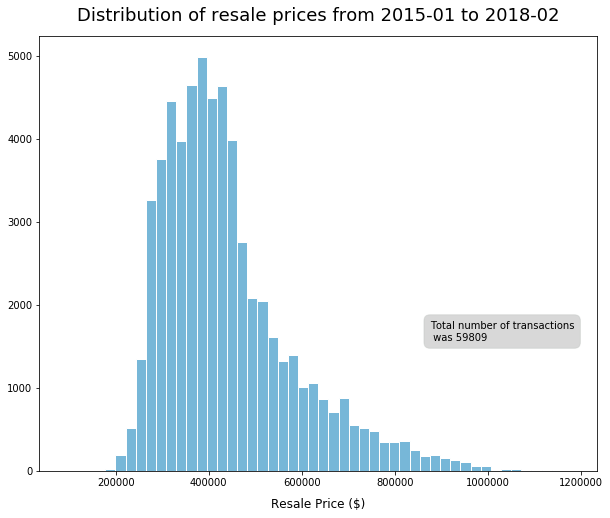

In [4]:
def create_histogram(df, filename, start, end):
    
    fig,ax = plt.subplots(figsize=(10,8))

    num_bins = 50
    
    ax.hist(df['resale_price'], bins=num_bins, edgecolor='white', color='#77B7D8')
    
    ax.set_xlabel("Resale Price ($)")
    ax.set_title("Distribution of resale prices from {} to {}".format(start,end))
    
    #show number of transactions in textbox 
    textlabel = "Total number of transactions\n was {}".format(len(df))
    bbox_prop = dict(boxstyle="round, pad=0.6", fc="gray",ec='#AFB6B1', alpha=0.3)
    ax.text(0.7, 0.3, textlabel, transform=ax.transAxes, bbox=bbox_prop)
    
    plt.savefig(filename, dpi = 300, bbox_inches='tight')
    plt.show()
    
filename = "generatedplots/"+ "resale_price_dist.png"   
create_histogram(data, filename, startdate, enddate)

## Boxplots by room-type

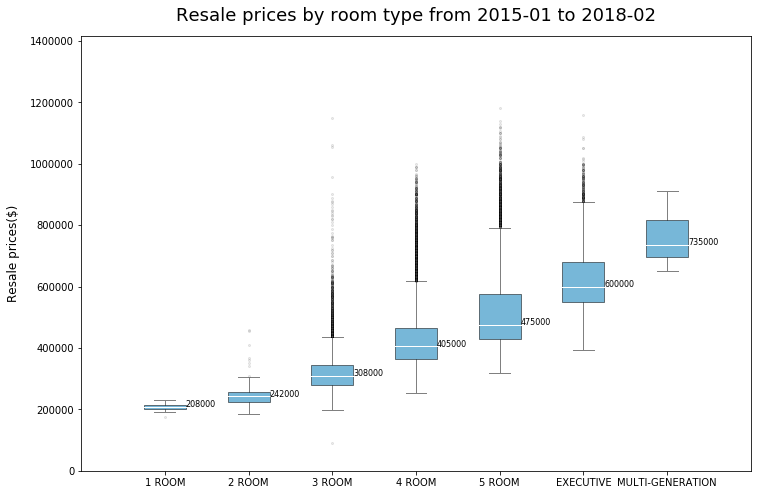

In [5]:
def create_boxplots_roomtype(df, filename, start, end):
    
    fig,ax = plt.subplots(figsize=(12,8))

    xlabels = np.unique(df['flat_type'])
    
    prices = df['resale_price']
    
    #define boxplot aesthetics
    boxprops = dict(linestyle='-', linewidth=0.5, facecolor = '#77B7D8' )
    flierprops = dict(marker='o', markerfacecolor='gray', markersize = 2, linestyle='none', alpha = 0.1)
    medianprops = dict(linestyle='-', linewidth=1, color='white')
    whiskerprops=dict(color='gray', linewidth = 1)
    capprops=dict(color='gray', linewidth = 1)
    
    bp = ax.boxplot([prices[df['flat_type']==label] for label in xlabels], labels = xlabels,
              boxprops = boxprops, flierprops = flierprops, medianprops = medianprops,
                    whiskerprops = whiskerprops, capprops = capprops,
                    patch_artist=True, widths = 0.5)
    
    ax.set_title("Resale prices by room type from {} to {}".format(start,end))
    ax.set_ylabel("Resale prices($)")
    ax.set_xlim(0,len(xlabels)+1) #set larger xlimit to accomodate text labels
    ax.set_ylim(0,prices.max()*1.2)
  
    #label median values
    for value in bp['medians']:
        x, y = value.get_xydata()[1] # right end point of median line
        ax.text(x, y, '{:.0f}'.format(y),horizontalalignment='left', fontsize = 8)
    
    plt.savefig(filename, dpi = 300, bbox_inches='tight')
    plt.show()

    
filename = "generatedplots/"+ "resale_price_boxplot.png"   
create_boxplots_roomtype(data, filename, startdate, enddate)

## Extract information for each town
#### 1) Transactions with highest resale price
#### 2) Transactions with lowest resale price
#### 3) Median resale price, median floor area, median lease remaining
#### 4) Total number of transactions
#### 5) Distribution of transactions by flat type

In [6]:
# extract information for each town and export to csv 

def towninfo(df, town, filename, flattypes):
    
    #get specs of highest resale price transaction
    highest_resale_price = df['resale_price'].max()
    hindex = df['resale_price'].argmax()
    h_transactdate = dt.datetime.strftime(df['month'][hindex],'%Y-%m')
    h_flattype = df['flat_type'][hindex].lower()
    h_floor = df['storey_range'][hindex].lower()
    h_area =  df['floor_area_sqm'][hindex]
    h_lease_rem = df['remaining_lease'][hindex]
    
    #get specs of lowest resale price transaction
    lowest_resale_price = df['resale_price'].min()
    lindex = df['resale_price'].argmin()
    l_transactdate = dt.datetime.strftime(df['month'][lindex],'%Y-%m')
    l_flattype = df['flat_type'][lindex].lower()
    l_floor = df['storey_range'][lindex].lower()
    l_area =  df['floor_area_sqm'][lindex]
    l_lease_rem = df['remaining_lease'][lindex]
    
    #get median values
    median_resale_price = np.median(df['resale_price'])
    median_area = np.median(df['floor_area_sqm'])
    median_lease= np.median(df['remaining_lease'])
    
    #get number of transactions
    numtransactions = len(df)
    p_1room, p_2room, p_3room, p_4room, p_5room, p_exec, p_mg = [(len(df[df['flat_type']==flattype])*100/numtransactions) for flattype in flattypes]

   
    #append specs to file
    with open(filename, 'a') as csvfile:
        fwriter = csv.writer(csvfile, delimiter=',')
        fwriter.writerow([town.title(), highest_resale_price,h_transactdate,h_flattype,h_floor,h_area,h_lease_rem,
                         lowest_resale_price,l_transactdate,l_flattype,l_floor,l_area,l_lease_rem,
                         median_resale_price, median_area, median_lease, 
                          numtransactions, p_1room, p_2room, p_3room, 
                          p_4room, p_5room, p_exec, p_mg])
    

    
# define header names for csv file
headers = ['town', 'highest_resale_price', 'h_transactdate', 'h_flattype', 'h_floor', 'h_area', 'h_lease_rem',
           'lowest_resale_price', 'l_transactdate', 'l_flattype', 'l_floor', 'l_area', 'l_lease_rem',
           'median_resale_price','median_floor_area','median_lease_remaining',
          'num_transactions','percent_1room', 'percent_2room', 'percent_3room', 
          'percent_4room', 'percent_5room','percent_exec','percent_mg']

filename = 'towninfo.csv'

#write header names for csvfile
with open(filename, 'w') as csvfile:
    fwriter = csv.writer(csvfile, delimiter=',')
    fwriter.writerow(headers)

#get highest resale price and flat specs for all towns
for town in towns:
    towninfo(data[data['town']==town],town,filename, flattypes)
   

## Scatterplot of resale prices vs remaining lease/floor area

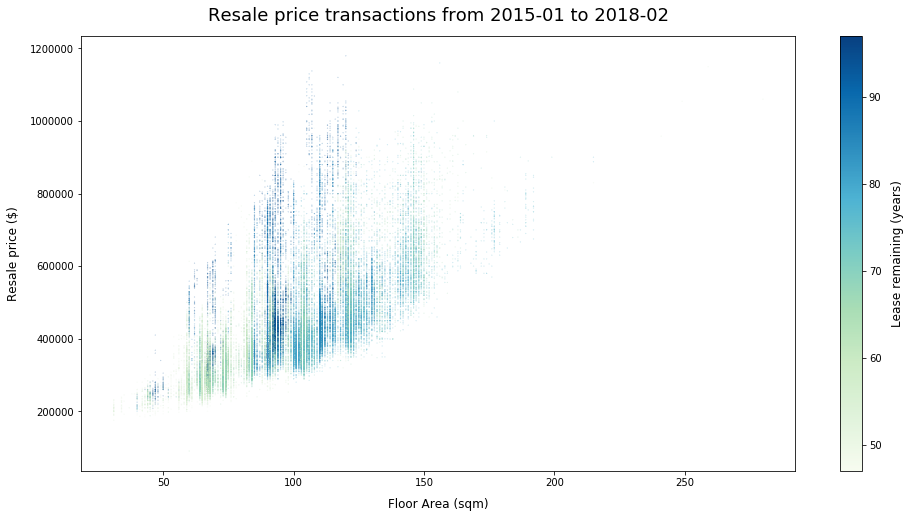

In [7]:
# plot all resale transactions in each town with variables resale price / lease / floor area
def scatter_all(df, filename, start, end):
    
    fig, ax = plt.subplots(figsize=(16,8))
    
    resale = df['resale_price']
    floorarea = df['floor_area_sqm']
    lease= df['remaining_lease']

    colormap=cm.GnBu #set colormap for lease variable
    
    #plot floor area vs resale price for each transaction, color of marker depends on lease remaining                                  
    ax.scatter(floorarea, resale, c=lease, cmap=colormap, marker='o', s=0.01)   
 
    ax.set_title('Resale price transactions from {} to {}'.format(start,end))
    ax.set_ylabel('Resale price ($)')
    ax.set_xlabel('Floor Area (sqm)')
    
    #plot colorbar for the lease variable
    normalize = mcolors.Normalize(vmin=np.min(lease), vmax=np.max(lease))
    for l in lease:
        plt.plot(color=colormap(normalize(l)))

    scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
    scalarmappaple.set_array(lease)
    cbar = plt.colorbar(scalarmappaple)
    cbar.ax.set_ylabel('Lease remaining (years)')
       
    plt.legend()
    plt.savefig(filename, dpi = 300, bbox_inches='tight')
    plt.show()



filename = "generatedplots/"+ "scatter_all.png"

scatter_all(data, filename, startdate, enddate)

## Visualize highest resale transactions on scatterplot

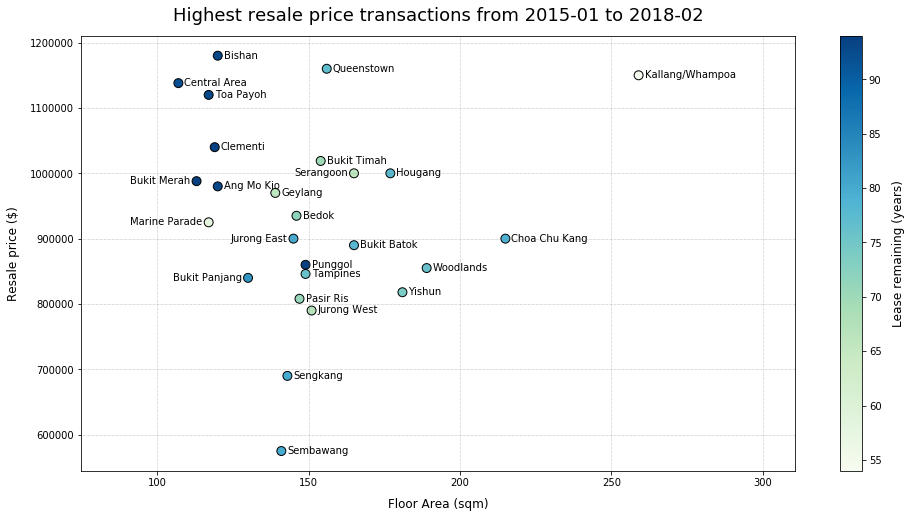

In [8]:
# plot the highest resale transactions in each town with variables resale price / lease / floor area
def scatter_highest(df,filename, start, end):
    
    fig, ax = plt.subplots(figsize=(16,8))
      
    resale = df['highest_resale_price']
    floorarea = df['h_area']
    lease = df['h_lease_rem']
    
    colormap=cm.GnBu #set colormap for lease variable
    
    #plot floor area vs resale price for each transaction, color of marker depends on lease remaining                                  
    ax.scatter(floorarea, resale, c=lease, cmap=colormap, marker='o', edgecolors='black', s=80)   
 
    ax.set_title('Highest resale price transactions from {} to {}'.format(start,end))
    ax.set_ylabel('Resale price ($)')
    ax.set_xlabel('Floor Area (sqm)')
    ax.set_xlim(np.min(floorarea)*0.7, np.max(floorarea)*1.2) #setting xlimits to accomodate text
  
    #plot colorbar for the lease variable
    normalize = mcolors.Normalize(vmin=np.min(lease), vmax=np.max(lease))
    for l in lease:
        plt.plot(color=colormap(normalize(l)))

    scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
    scalarmappaple.set_array(lease)
    cbar = plt.colorbar(scalarmappaple)
    cbar.ax.set_ylabel('Lease remaining (years)')
    
    #annotate each transaction by town. if/else statements to tweak the positioning of text so that they don't overlap
    textlabels = [town.title() for town in df['town']]
    for i,town in enumerate(textlabels):
        if town in ['Serangoon', 'Bukit Panjang', 'Bukit Merah', 'Jurong East',
                   'Marine Parade']:
            ax.text(floorarea[i]-2,resale[i]-4000,town,fontsize=10, horizontalalignment = 'right')
        else:
            ax.text(floorarea[i]+2,resale[i]-4000,town,fontsize=10, horizontalalignment = 'left')
       
    ax.grid(color='gray', linestyle=':', linewidth=0.5, which='major')
    
    plt.legend()
    plt.savefig(filename, dpi = 300, bbox_inches='tight')
    plt.show()


datafile = 'towninfo.csv'

cols = ['town', 'highest_resale_price', 'h_area', 'h_lease_rem']
dtype = ['U50','f8','f8','f8'] 

highest_data = np.genfromtxt(datafile, skip_header=1,names=headers, dtype = dtype,
                       usecols = cols, delimiter=",")

filename = "generatedplots/"+ "highestresale_scatter.png"
scatter_highest(highest_data,filename, startdate, enddate)

## Visualize median prices for each town

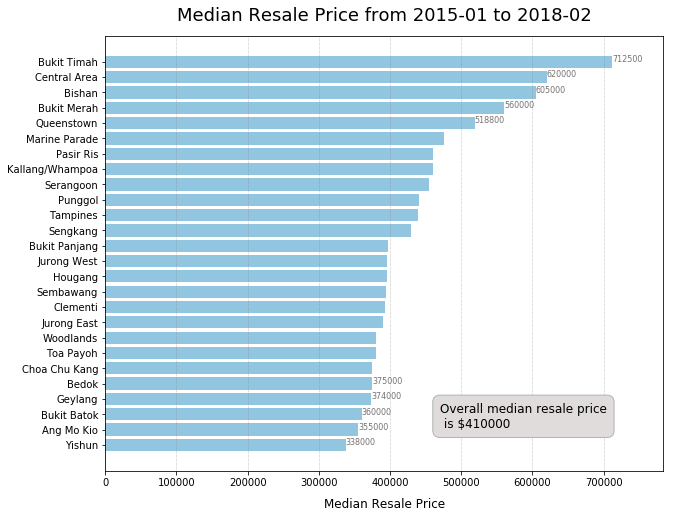

In [9]:
def bar_medianresaleprice(df, filename, start, end, medianprice):
    

    df_sort = np.sort(df, axis = 0, order = 'median_resale_price') #sort in ascending order
    
    fig, ax = plt.subplots(figsize=(10,8))
    
    ypos = np.arange(0, len(df_sort))
    ylabels = [town.title() for town in df_sort['town']]
    median_price = df_sort['median_resale_price']
    opacity = 0.8
    
    ax.barh(ypos, median_price, color='#77B7D8', alpha = opacity) 
    
    ax.set_yticks(ypos)
    ax.set_yticklabels(ylabels)
    ax.set_xlabel('Median Resale Price')
    ax.set_xlim(0,median_price.max()*1.1)
    ax.set_title('Median Resale Price from {} to {}'.format(start,end))
    
    #get 5 highest and 5 lowest resale prices from the sorted array
    maxval = median_price[-5:]
    maxindex = ypos[-5:]
    minval = median_price[0:5]
    minindex = ypos[0:5]
    ax.grid(color='gray', linestyle=':', linewidth=0.5, axis='x', which='major')
    
    #show values of 5 highest and 5 medianresale prices 
    for value, index in zip(maxval, maxindex):
        ax.text(value,index, "{:.0f}".format(value), fontsize = 8, color ='#777274')
    
    for value, index  in zip(minval, minindex):
        ax.text(value,index,"{:.0f}".format(value), fontsize = 8, color ='#777274')     
    
    textlabel = "Overall median resale price\n is ${:.0f}".format(medianprice)
    bbox_prop = dict(boxstyle="round, pad=0.6", fc="#E0DCDC",ec='#AFB6B1', alpha=1)
    ax.text(0.6, 0.1, textlabel, transform=ax.transAxes, bbox=bbox_prop,fontsize = 12)
   
    plt.savefig(filename, dpi = 300, bbox_inches='tight')
    plt.show()

    
datafile = 'towninfo.csv'

cols = ['town', 'median_resale_price','median_floor_area','median_lease_remaining']
dtype = ['U50','f8','f8','f8'] 

median_data = np.genfromtxt(datafile, skip_header=1,names=headers, dtype = dtype,
                       usecols = cols, delimiter=",")    
    
filename = "generatedplots/"+ "median_resale_bytown.png"   

bar_medianresaleprice(median_data, filename, startdate, enddate, medianprice)

## Visualize median price, floor area and lease remaining using scatterplot

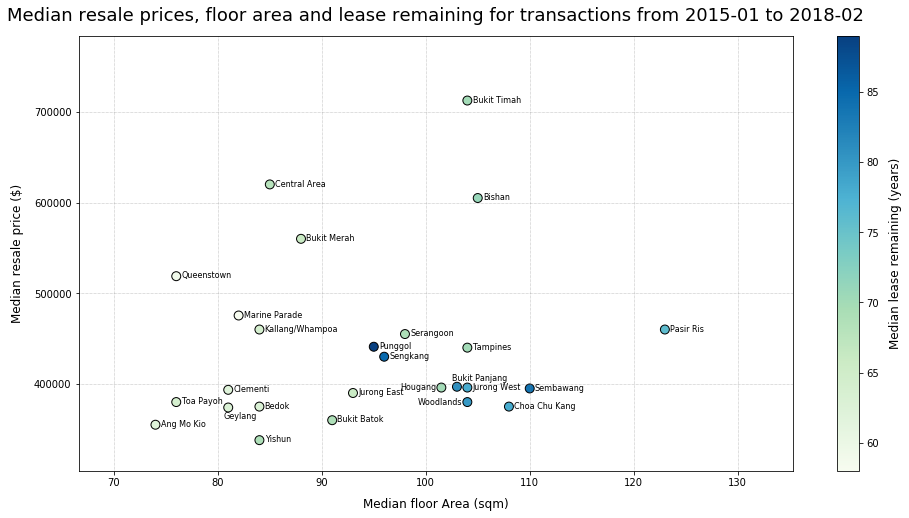

In [10]:
# plot the median resale price, median floor area and median lease remaining

def scatter_median(df,filename, start, end):
    
    fig, ax = plt.subplots(figsize=(16,8))
    
    resale = df['median_resale_price']
    floorarea = df['median_floor_area']
    lease = df['median_lease_remaining']
    
    colormap=cm.GnBu #set colormap for lease variable
    
    #plot floor area vs resale price for each transaction, color of marker depends on lease remaining                                  
    ax.scatter(floorarea, resale, c=lease, cmap=colormap, marker='o', edgecolors='black', s=80)   
 
    ax.set_title('Median resale prices, floor area and lease remaining for transactions from {} to {}'.format(start,end))
    ax.set_ylabel('Median resale price ($)')
    ax.set_xlabel('Median floor Area (sqm)')
    ax.set_xlim(np.min(floorarea)*0.9, np.max(floorarea)*1.1) #setting xlimits to accomodate text
    ax.set_ylim(np.min(resale)*0.9, np.max(resale)*1.1) #setting ylimits to accomodate text
  
    #plot colorbar for the lease variable
    normalize = mcolors.Normalize(vmin=np.min(lease), vmax=np.max(lease))
    for l in lease:
        plt.plot(color=colormap(normalize(l)))

    scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
    scalarmappaple.set_array(lease)
    cbar = plt.colorbar(scalarmappaple)
    cbar.ax.set_ylabel('Median lease remaining (years)')
    
    #annotate each transaction by town. if/else here to tweak the positioning of text so that they don't overlap
    textlabels = [town.title() for town in towns]
    for i,town in enumerate(textlabels):
        if town in ['Hougang', 'Woodlands']:
            ax.text(floorarea[i]-0.5,resale[i]-2500,town,fontsize=8, horizontalalignment = 'right')
        elif town in[ 'Bukit Panjang']:
            ax.text(floorarea[i]-0.5,resale[i]+6500,town,fontsize=8, horizontalalignment = 'left')
        elif town in[ 'Geylang']:
            ax.text(floorarea[i]-0.5,resale[i]-12000,town,fontsize=8, horizontalalignment = 'left')
        else:
            ax.text(floorarea[i]+0.5,resale[i]-2000,town,fontsize=8, horizontalalignment = 'left')
       
    ax.grid(color='gray', linestyle=':', linewidth=0.5, which='major')
    
    plt.legend()
    plt.savefig(filename, dpi = 300, bbox_inches='tight')
    plt.show()


filename = "generatedplots/"+ "median_scatter.png"

scatter_median(median_data,filename, startdate, enddate)